In [60]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import urllib.request
import pandas as pd

def download_data(url):
    with urllib.request.urlopen(url) as response:
        data = response.read().decode('utf-8')
    return data

def convert_to_csv(data, output_file):
    # Read JSON data into a DataFrame
    df = pd.read_json(data)

    # Save DataFrame to CSV
    df.to_csv(output_file, index=False)
    print(f"Data saved to {output_file}.")

url = 'https://data.nasa.gov/resource/y77d-th95.json'
output_file = 'nasa_data.csv'

    # Download the data
json_data = download_data(url)

    # Convert to CSV
convert_to_csv(json_data, output_file)


Data saved to nasa_data.csv.


In [142]:
data = pd.read_csv('/content/nasa_data.csv')

In [143]:
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN


#EDA

In [144]:
data.shape

(1000, 12)

In [145]:
data.keys()

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'geolocation', ':@computed_region_cbhk_fwbd',
       ':@computed_region_nnqa_25f4'],
      dtype='object')

In [146]:
data.isnull().sum()

name                             0
id                               0
nametype                         0
recclass                         0
mass                            28
fall                             0
year                             1
reclat                          12
reclong                         12
geolocation                     12
:@computed_region_cbhk_fwbd    867
:@computed_region_nnqa_25f4    866
dtype: int64

In [147]:
data = data.dropna(subset=['geolocation'])

In [148]:
data.isnull().sum()

name                             0
id                               0
nametype                         0
recclass                         0
mass                            28
fall                             0
year                             1
reclat                           0
reclong                          0
geolocation                      0
:@computed_region_cbhk_fwbd    855
:@computed_region_nnqa_25f4    854
dtype: int64

In [149]:
objs = [data, pd.DataFrame(data['geolocation'].tolist()).iloc[:, :3]]
data2 = pd.concat(objs, axis=1).drop('geolocation', axis=1)

In [150]:
import pandas as pd
from pandas.io.json import json_normalize
import ast

In [151]:
data['geolocation'] = data['geolocation'].apply(ast.literal_eval)
data[['geolocation_type', 'geolocation_coordinates']] = pd.json_normalize(data['geolocation'])
data.drop('geolocation', axis=1, inplace=True)


In [152]:
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,geolocation_type,geolocation_coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,NaN,NaN,Point,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,NaN,NaN,Point,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,NaN,NaN,Point,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,NaN,NaN,Point,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,NaN,NaN,Point,"[-64.95, -33.16667]"


In [153]:
# Convert the "geolocation" column from JSON to separate columns

data[['longitude', 'latitude']] = data['geolocation_coordinates'].apply(pd.Series)
data.drop(['geolocation_coordinates'], axis=1, inplace=True)

In [154]:
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,geolocation_type,longitude,latitude
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,NaN,NaN,Point,6.08333,50.77500
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,NaN,NaN,Point,10.23333,56.18333
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,NaN,NaN,Point,-113.00000,54.21667
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,NaN,NaN,Point,-99.90000,16.88333
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,NaN,NaN,Point,-64.95000,-33.16667


In [155]:
data['year'] = pd.to_datetime(data['year'], errors='coerce')
data['year'] = data['year'].dt.strftime('%Y-%m-%d')



In [156]:
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,geolocation_type,longitude,latitude
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,NaN,NaN,Point,6.08333,50.77500
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,NaN,NaN,Point,10.23333,56.18333
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,NaN,NaN,Point,-113.00000,54.21667
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,NaN,NaN,Point,-99.90000,16.88333
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,NaN,NaN,Point,-64.95000,-33.16667


In [157]:
# Dealing with Null Values

In [158]:
data.isnull().sum()

name                             0
id                               0
nametype                         0
recclass                         0
mass                            28
fall                             0
year                            18
reclat                           0
reclong                          0
:@computed_region_cbhk_fwbd    855
:@computed_region_nnqa_25f4    854
geolocation_type                12
longitude                       12
latitude                        12
dtype: int64

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         988 non-null    object 
 1   id                           988 non-null    int64  
 2   nametype                     988 non-null    object 
 3   recclass                     988 non-null    object 
 4   mass                         960 non-null    float64
 5   fall                         988 non-null    object 
 6   year                         970 non-null    object 
 7   reclat                       988 non-null    float64
 8   reclong                      988 non-null    float64
 9   :@computed_region_cbhk_fwbd  133 non-null    float64
 10  :@computed_region_nnqa_25f4  134 non-null    float64
 11  geolocation_type             976 non-null    object 
 12  longitude                    976 non-null    float64
 13  latitude            

In [160]:
data.shape

(988, 14)

In [161]:
#filling missing of 'mass' column with median
data['mass'].fillna(data['mass'].median(), inplace=True)

In [162]:
data.isnull().sum()

name                             0
id                               0
nametype                         0
recclass                         0
mass                             0
fall                             0
year                            18
reclat                           0
reclong                          0
:@computed_region_cbhk_fwbd    855
:@computed_region_nnqa_25f4    854
geolocation_type                12
longitude                       12
latitude                        12
dtype: int64

In [163]:
data['year'].fillna(data['year'].mode()[0],inplace=True)

In [164]:
data.isnull().sum()

name                             0
id                               0
nametype                         0
recclass                         0
mass                             0
fall                             0
year                             0
reclat                           0
reclong                          0
:@computed_region_cbhk_fwbd    855
:@computed_region_nnqa_25f4    854
geolocation_type                12
longitude                       12
latitude                        12
dtype: int64

In [165]:
#'Geolocation_type' is an object type column. So, it will be filled by using 'mode.
data['geolocation_type'].fillna(data['geolocation_type'].mode()[0], inplace =True)

In [166]:
data.isnull().sum()

name                             0
id                               0
nametype                         0
recclass                         0
mass                             0
fall                             0
year                             0
reclat                           0
reclong                          0
:@computed_region_cbhk_fwbd    855
:@computed_region_nnqa_25f4    854
geolocation_type                 0
longitude                       12
latitude                        12
dtype: int64

In [167]:
# Now, the two columns which have null values 'longitude','latitude' are int type
l1=['latitude', 'longitude']
data[l1] = data[l1].fillna(data[l1].median())


In [168]:
#Now, removing the two columns, as they have more than 80% missing values

data.drop([':@computed_region_cbhk_fwbd', ':@computed_region_nnqa_25f4'], axis=1, inplace=True)


In [169]:
data.isnull().sum()

name                0
id                  0
nametype            0
recclass            0
mass                0
fall                0
year                0
reclat              0
reclong             0
geolocation_type    0
longitude           0
latitude            0
dtype: int64

In [170]:
#The data is cleaned.


In [171]:
#DATA VISUALIZATION

<ipython-input-172-c5800093f7a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


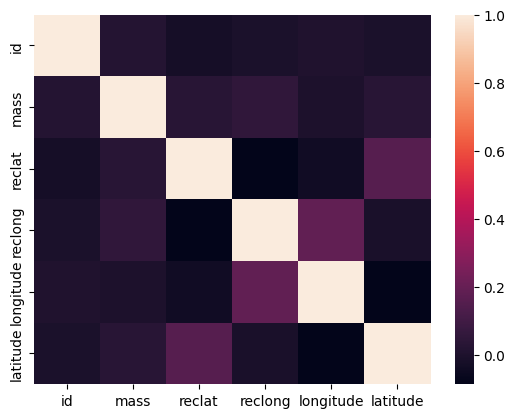

In [172]:
sns.heatmap(data.corr())
plt.show()

In [173]:
category_counts = data['fall'].value_counts()
category_counts

Fell     987
Found      1
Name: fall, dtype: int64

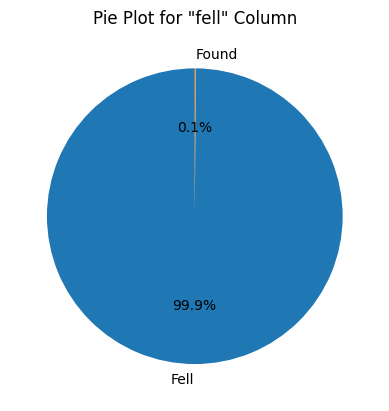

In [174]:
# Create a pie plot
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Pie Plot for "fell" Column')

# Display the plot
plt.show()

# Out of 100% , 0.1% meteroids are found

In [175]:
plt.figure(figsize=(10, 6))
fall_counts = data.groupby('month_date_year')['fall'].count()
plt.plot(fall_counts.index, fall_counts.values, marker='o', linestyle='-', color='b')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Falls')
plt.title('Trend of Meteoroid Falls Year-wise')

# Show the plot
plt.show()
#In the code above, we first group the data by the 'year' column and count the number of falls in each year using groupby() and count() methods. Then, we create a line plot using plt.plot(), where the x-axis represents the years (fall_counts.index) and



# Here we can see, year wise trend of fall

KeyError: ignored

<Figure size 1000x600 with 0 Axes>

#INSIGHTS

```
# This is formatted as code
```



<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              988 non-null    object 
 1   id                988 non-null    int64  
 2   nametype          988 non-null    object 
 3   recclass          988 non-null    object 
 4   mass              988 non-null    float64
 5   fall              988 non-null    object 
 6   year              988 non-null    object 
 7   reclat            988 non-null    float64
 8   reclong           988 non-null    float64
 9   geolocation_type  988 non-null    object 
 10  longitude         988 non-null    float64
 11  latitude          988 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 132.6+ KB


Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [178]:
#1. Get all the Earth meteorites that fell before the year 2000
# Convert 'month_date_year' column to datetime format
# Convert 'month_date_year' column to datetime format

earth_meteorites= data[data['year'].dt.year < 2000]

earth_meteorites

AttributeError: ignored

In [180]:
# Converting the datatype of 'year' to date time
data['year'] = pd.to_datetime(data['year'])


earth_meteorites = data[data['year'].dt.year < 2000]

In [181]:
earth_meteorites

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation_type,longitude,latitude
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,Point,6.08333,50.775000
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,Point,10.23333,56.183330
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,Point,-113.00000,54.216670
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,Point,-99.90000,16.883330
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,Point,-64.95000,-33.166670
...,...,...,...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01,54.50000,35.20000,Point,16.70000,35.916665
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01,13.63333,79.41667,Point,16.70000,35.916665
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01,-7.08333,111.53333,Point,16.70000,35.916665
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01,-6.66667,106.58333,Point,16.70000,35.916665


In [184]:
#Get all the earth meteorites co-ordinates who fell before the year 1970
earth_meteorites = data[data['year'].dt.year < 1970]

# Select the 'latitude' and 'longitude' columns
coordinates = earth_meteorites[['year','latitude', 'longitude']]
coordinates

,year,latitude,longitude
0,1880-01-01,50.775000,6.08333
1,1951-01-01,56.183330,10.23333
2,1952-01-01,54.216670,-113.00000
4,1902-01-01,-33.166670,-64.95000
5,1919-01-01,32.100000,71.80000
...,...,...,...
994,1807-01-01,35.916665,16.70000
995,1934-01-01,35.916665,16.70000
997,1869-01-01,35.916665,16.70000
998,1922-01-01,35.916665,16.70000


In [ ]:
#Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [185]:
earth_meteorites = data[data['mass'] > 10000]
earth_meteorites

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation_type,longitude,latitude
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,Point,-113.00000,54.216670
7,Agen,392,Valid,H5,30000.0,Fell,1814-01-01,44.21667,0.61667,Point,0.61667,44.216670
11,Aïr,424,Valid,L6,24000.0,Fell,1925-01-01,19.08333,8.38333,Point,8.38333,19.083330
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981-01-01,39.91667,42.81667,Point,42.81667,39.916670
27,Alfianello,466,Valid,L6,228000.0,Fell,1883-01-01,45.26667,10.15000,Point,10.15000,45.266670
...,...,...,...,...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,Fell,1878-01-01,49.60000,17.11667,Point,16.70000,35.916665
992,Tilden,23998,Valid,L6,74800.0,Fell,1927-01-01,38.20000,-89.68333,Point,16.70000,35.916665
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01,54.50000,35.20000,Point,16.70000,35.916665
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01,-7.08333,111.53333,Point,16.70000,35.916665
